In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from matplotlib import gridspec

## data distribution

In [ ]:
df = pd.read_csv('data/ny/NY-DensityEPR-1-0-1000.csv')
sampled = df.sample(n=100000, replace=True)
fig = plt.figure(dpi=300, tight_layout=True)
ax = Axes3D(fig)
ax.scatter(sampled['lat'], sampled['lng'], sampled['time'], ".",s=0.01)

# 軸ラベル
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('', fontsize=15)
ax.set_zlabel('', fontsize=15)
# ax.tick_params(
#     axis='z',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)

ax.zaxis.set_ticklabels([])
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)
    
# ax.set_title('NewYork', fontsize=15)
    
# 表示
plt.tight_layout()
plt.savefig('ny-dist.png')

In [ ]:
df = pd.read_csv('data/kinki/server-14000.csv', header=None)
sampled = df.sample(n=100000, replace=True)
sampled.columns = ['time', 'lng', 'lat']

fig = plt.figure(dpi=300, tight_layout=True)
ax = Axes3D(fig)
ax.scatter(sampled['lat'], sampled['lng'], sampled['time'], ".",s=0.1)

# 軸ラベル
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('', fontsize=15)
ax.set_zlabel('', fontsize=15)
# ax.tick_params(
#     axis='z',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)


ax.zaxis.set_ticklabels([])
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)
    
ax.set_title('Kinki', fontsize=20)
    
# 表示
plt.savefig('kinki-dist.png')

In [ ]:
df = pd.read_csv('data/tokyo/server-14000.csv', header=None)
sampled = df.sample(n=100000, replace=True)
sampled.columns = ['time', 'lng', 'lat']

fig = plt.figure(dpi=300, tight_layout=True)
ax = Axes3D(fig)
ax.scatter(sampled['lat'], sampled['lng'], sampled['time'], ".",s=0.01)

# 軸ラベル
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('', fontsize=15)
ax.set_zlabel('', fontsize=15)
# ax.tick_params(
#     axis='z',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)

ax.zaxis.set_ticklabels([])
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)
    
ax.set_title('Tokyo', fontsize=20)
    
# 表示
plt.savefig('tokyo-dist.png')

## data compression

In [2]:
sns.set()
sns.set(font="serif")

In [118]:
# compressions = {
#     'dataset': ['NY (21-21)', 'NY (21-21)', 'NY (24-22)', 'NY (24-22)',  'NY (25-25)', 'NY (25-25)', 'Kinki', 'Kinki', 'Tokyo', 'Tokyo', 'Random', 'Random'],
#     'Data structure': ['FST', 'HashTable', 'FST', 'HashTable', 'FST', 'HashTable', 'FST', 'HashTable', 'FST', 'HashTable', 'FST', 'HashTable'],
#     'size (B)': [16673041, 84826628, 39821783, 173460728, 61820395, 253932888, 5876338, 24478208, 3337067, 13035503, 132963807, 302400008]
# }

compression_ny = {
    'dataset': ['NY (21-21)', 'NY (21-21)', 'NY (24-22)', 'NY (24-22)',  'NY (25-25)', 'NY (25-25)'],
    'Data structure': ['FST', 'Hashmap', 'FST', 'Hashmap', 'FST', 'Hashmap'],
    'size (MB)': [16.673041, 84.826628, 39.821783, 173.460728, 61.820395, 253.932888],
}

compression_ny_df = pd.DataFrame.from_dict(compression_ny)

compression_kinki = {
    'dataset': ['Kinki', 'Kinki'],
    'Data structure': ['FST', 'Hashmap'],
    'size (MB)': [5.876338, 24.478208]
}

compression_kinki_df = pd.DataFrame.from_dict(compression_kinki)

compression_tokyo = {
    'dataset': ['Tokyo', 'Tokyo'],
    'Data structure': ['FST', 'Hashmap'],
    'size (MB)': [3.337067, 13.035503]
}

compression_tokyo_df = pd.DataFrame.from_dict(compression_tokyo)

compression_rand = {
    'dataset': ['Random', 'Random'],
    'Data structure': ['FST', 'Hashmap'],
    'size (MB)': [132.963807, 302.400008]
}

compression_rand_df = pd.DataFrame.from_dict(compression_rand)



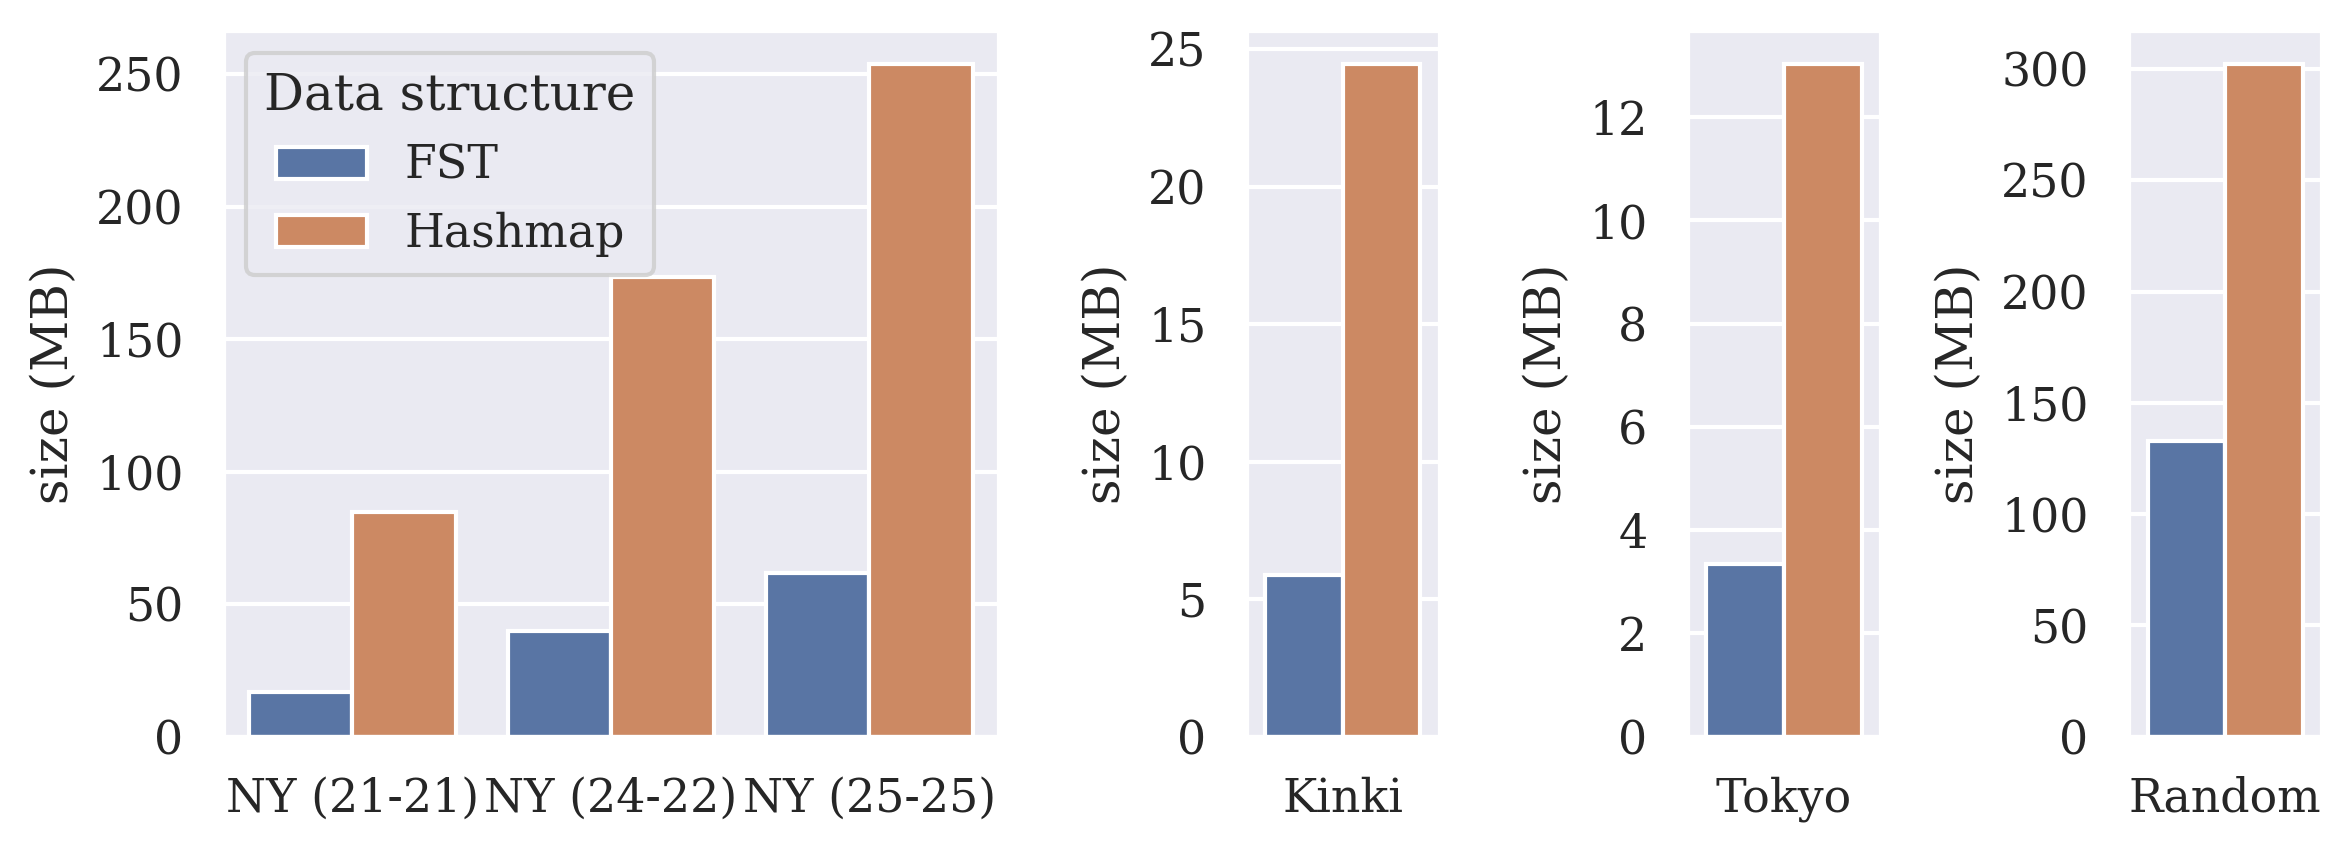

In [128]:
fig = plt.figure(figsize=(8.0, 3.0), dpi=300)
spec = gridspec.GridSpec(ncols=4, nrows=1,
                         width_ratios=[4, 1, 1, 1])

ax1 = fig.add_subplot(spec[0])
sns.barplot(x='dataset', hue="Data structure", y="size (MB)", data=compression_ny_df, ax=ax1)
ax1.set_xlabel('')

ax2 = fig.add_subplot(spec[1])
sns.barplot(x='dataset', hue="Data structure", y="size (MB)", data=compression_kinki_df, ax=ax2)
ax2.get_legend().remove()
ax2.set_xlabel('')

ax3 = fig.add_subplot(spec[2])
sns.barplot(x='dataset', hue="Data structure", y="size (MB)", data=compression_tokyo_df, ax=ax3)
ax3.get_legend().remove()
ax3.set_xlabel('')

ax4 = fig.add_subplot(spec[3])
sns.barplot(x='dataset', hue="Data structure", y="size (MB)", data=compression_rand_df, ax=ax4)
ax4.get_legend().remove()
ax4.set_xlabel('')

plt.tight_layout()
plt.savefig('compression.png')

## Chunk detail

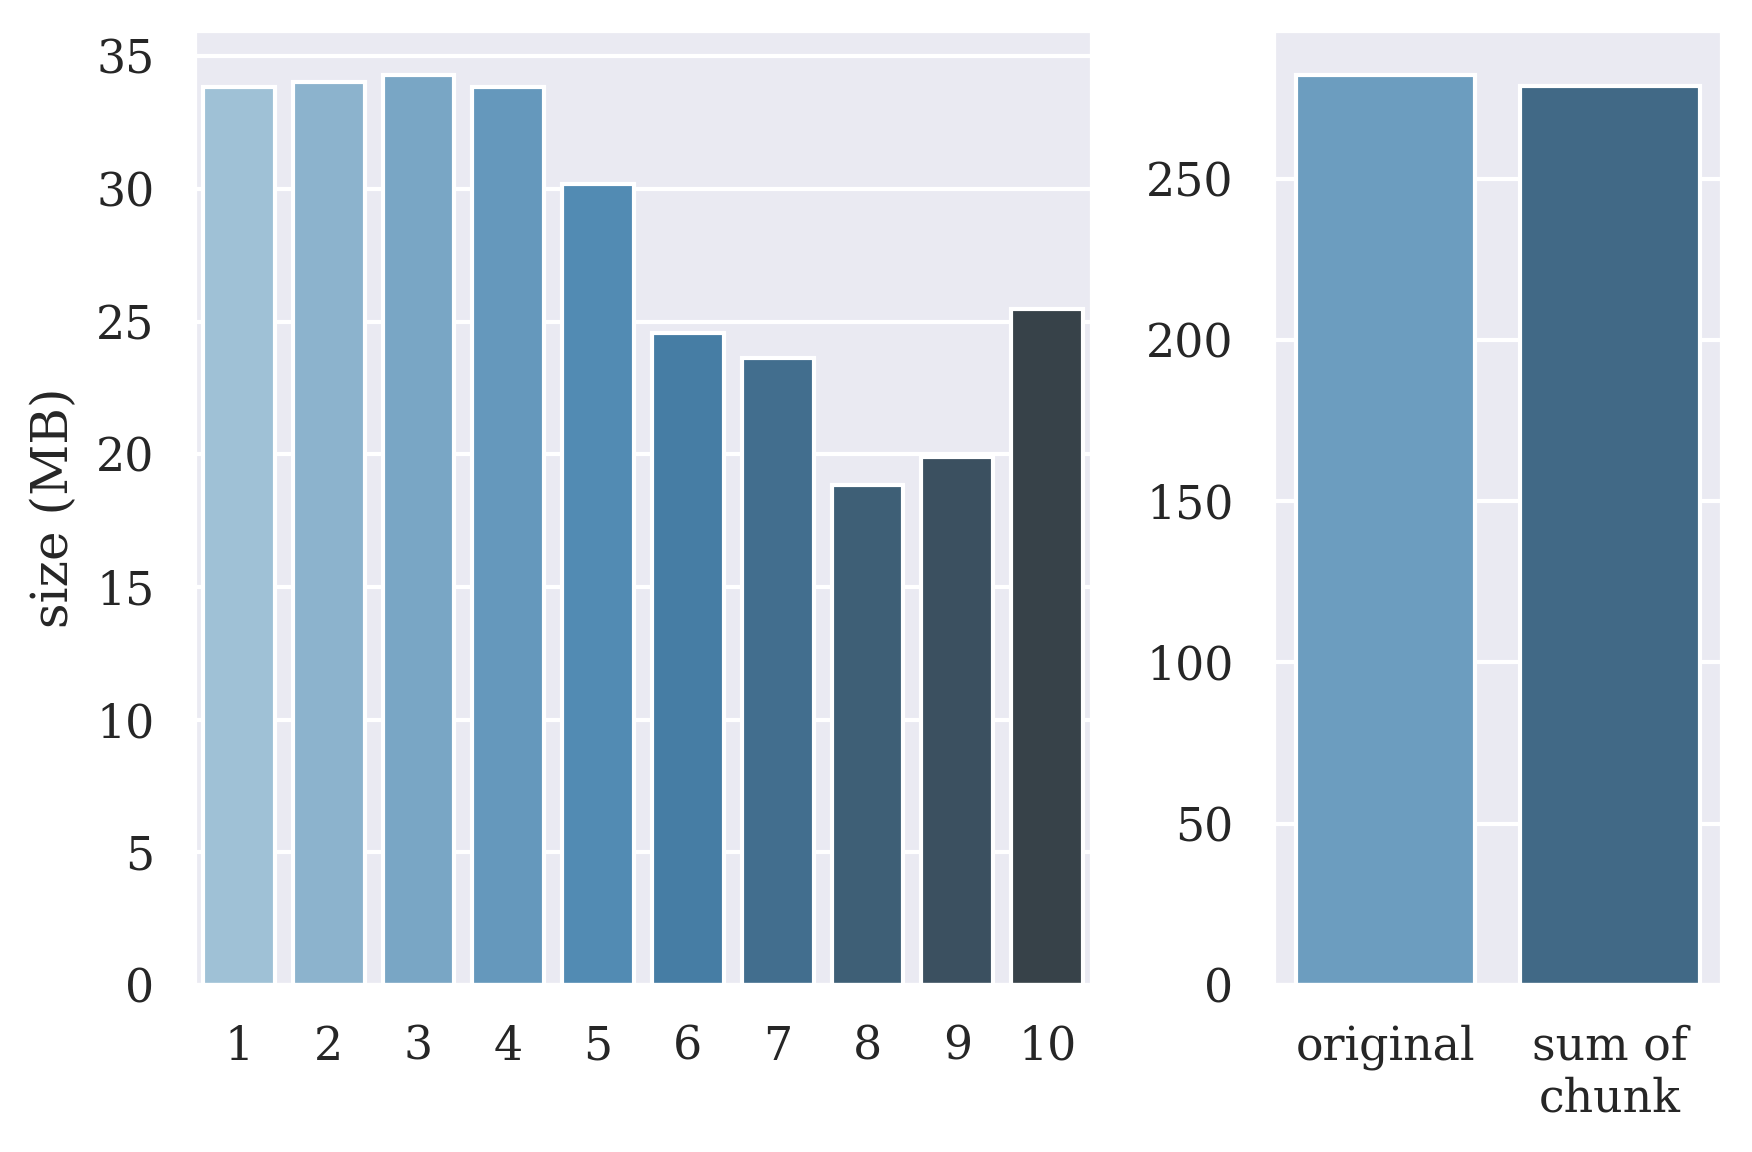

In [202]:

chunk_detail_data = [33.831481, 34.041794, 34.272667, 33.841179, 30.177781, 24.570333, 23.611503, 18.848406, 19.911478, 25.477068]

i = list(range(1, len(chunk_detail_data)+1))

fig = plt.figure(figsize=(6.0, 4.0), dpi=300)
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[2, 1])

ax1 = fig.add_subplot(spec[0])
sns.barplot(x=i, y=chunk_detail_data, ax=ax1, palette="Blues_d")
ax1.set_ylabel('size (MB)')

ax2 = fig.add_subplot(spec[1])
sns.barplot(x=['original', 'sum of\nchunk'], y=[282, sum(chunk_detail_data)], ax=ax2, palette="Blues_d")



plt.tight_layout()
plt.savefig('compression-detail.png')

In [105]:
current_palette = sns.color_palette(n_colors=24)

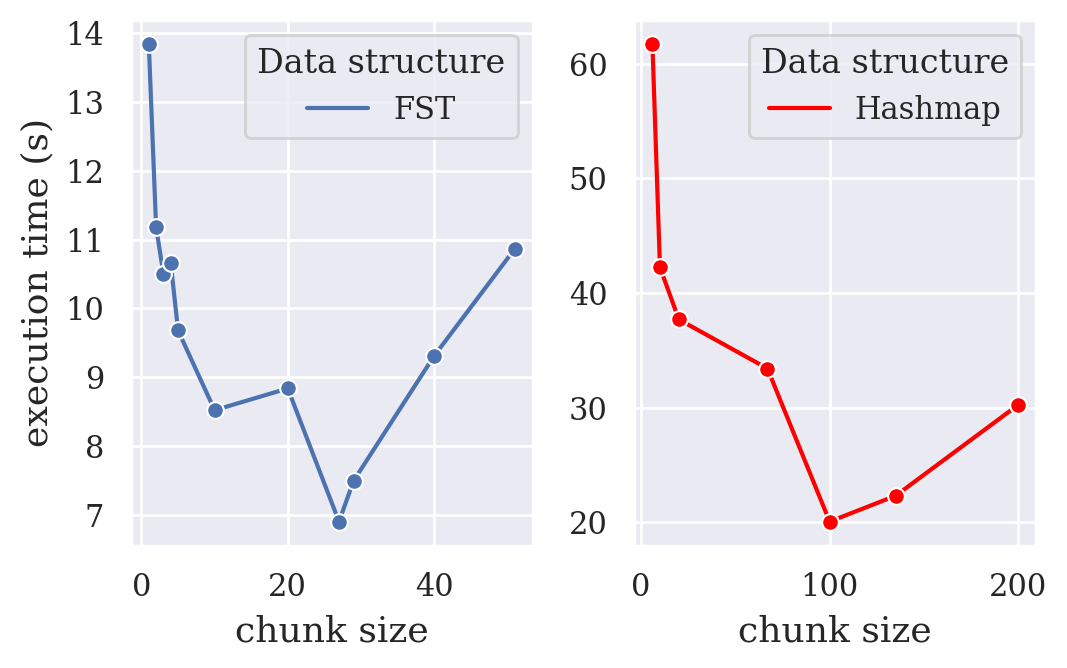

In [141]:
fig = plt.figure(dpi=200, figsize=(5.5, 3.5))

fst_chunk_df = {
    "Data structure": ['FST','FST', 'FST','FST','FST','FST','FST','FST', 'FST', 'FST', 'FST'],
    'chunk size': [1, 2, 3, 4, 5, 10, 20, 27, 29, 40, 51],
    'second': [13.844428, 11.181056, 10.503665, 10.662121, 9.680820, 8.522483, 8.838311, 6.903676, 7.497898, 9.309890, 10.862754],
}
ax1 = fig.add_subplot(1, 2, 1) 
sns.lineplot(x="chunk size", y="second", hue='Data structure', data=fst_chunk_df, ax=ax1, marker="o")
ax1.set_xlabel('chunk size', fontsize=13)
ax1.set_ylabel('execution time (s)', fontsize=13)

hashmap_chunk_df = {
    "Data structure": ['Hashmap', 'Hashmap', 'Hashmap', 'Hashmap', 'Hashmap', 'Hashmap', 'Hashmap'],
    'chunk size': [6, 10, 20, 67, 100, 135, 200],
    'second': [61.742641, 42.251521, 37.700889, 33.419977, 20.062251, 22.318355 , 30.249169],
}
# (1, 532.196979)
ax2 = fig.add_subplot(1, 2, 2) 
sns.lineplot(x="chunk size", y="second", hue='Data structure', data=hashmap_chunk_df, ax=ax2, marker="o", palette=['red'])
ax2.set_xlabel('chunk size', fontsize=13)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()
fig.savefig('chunk.png')

## Total performance

## params

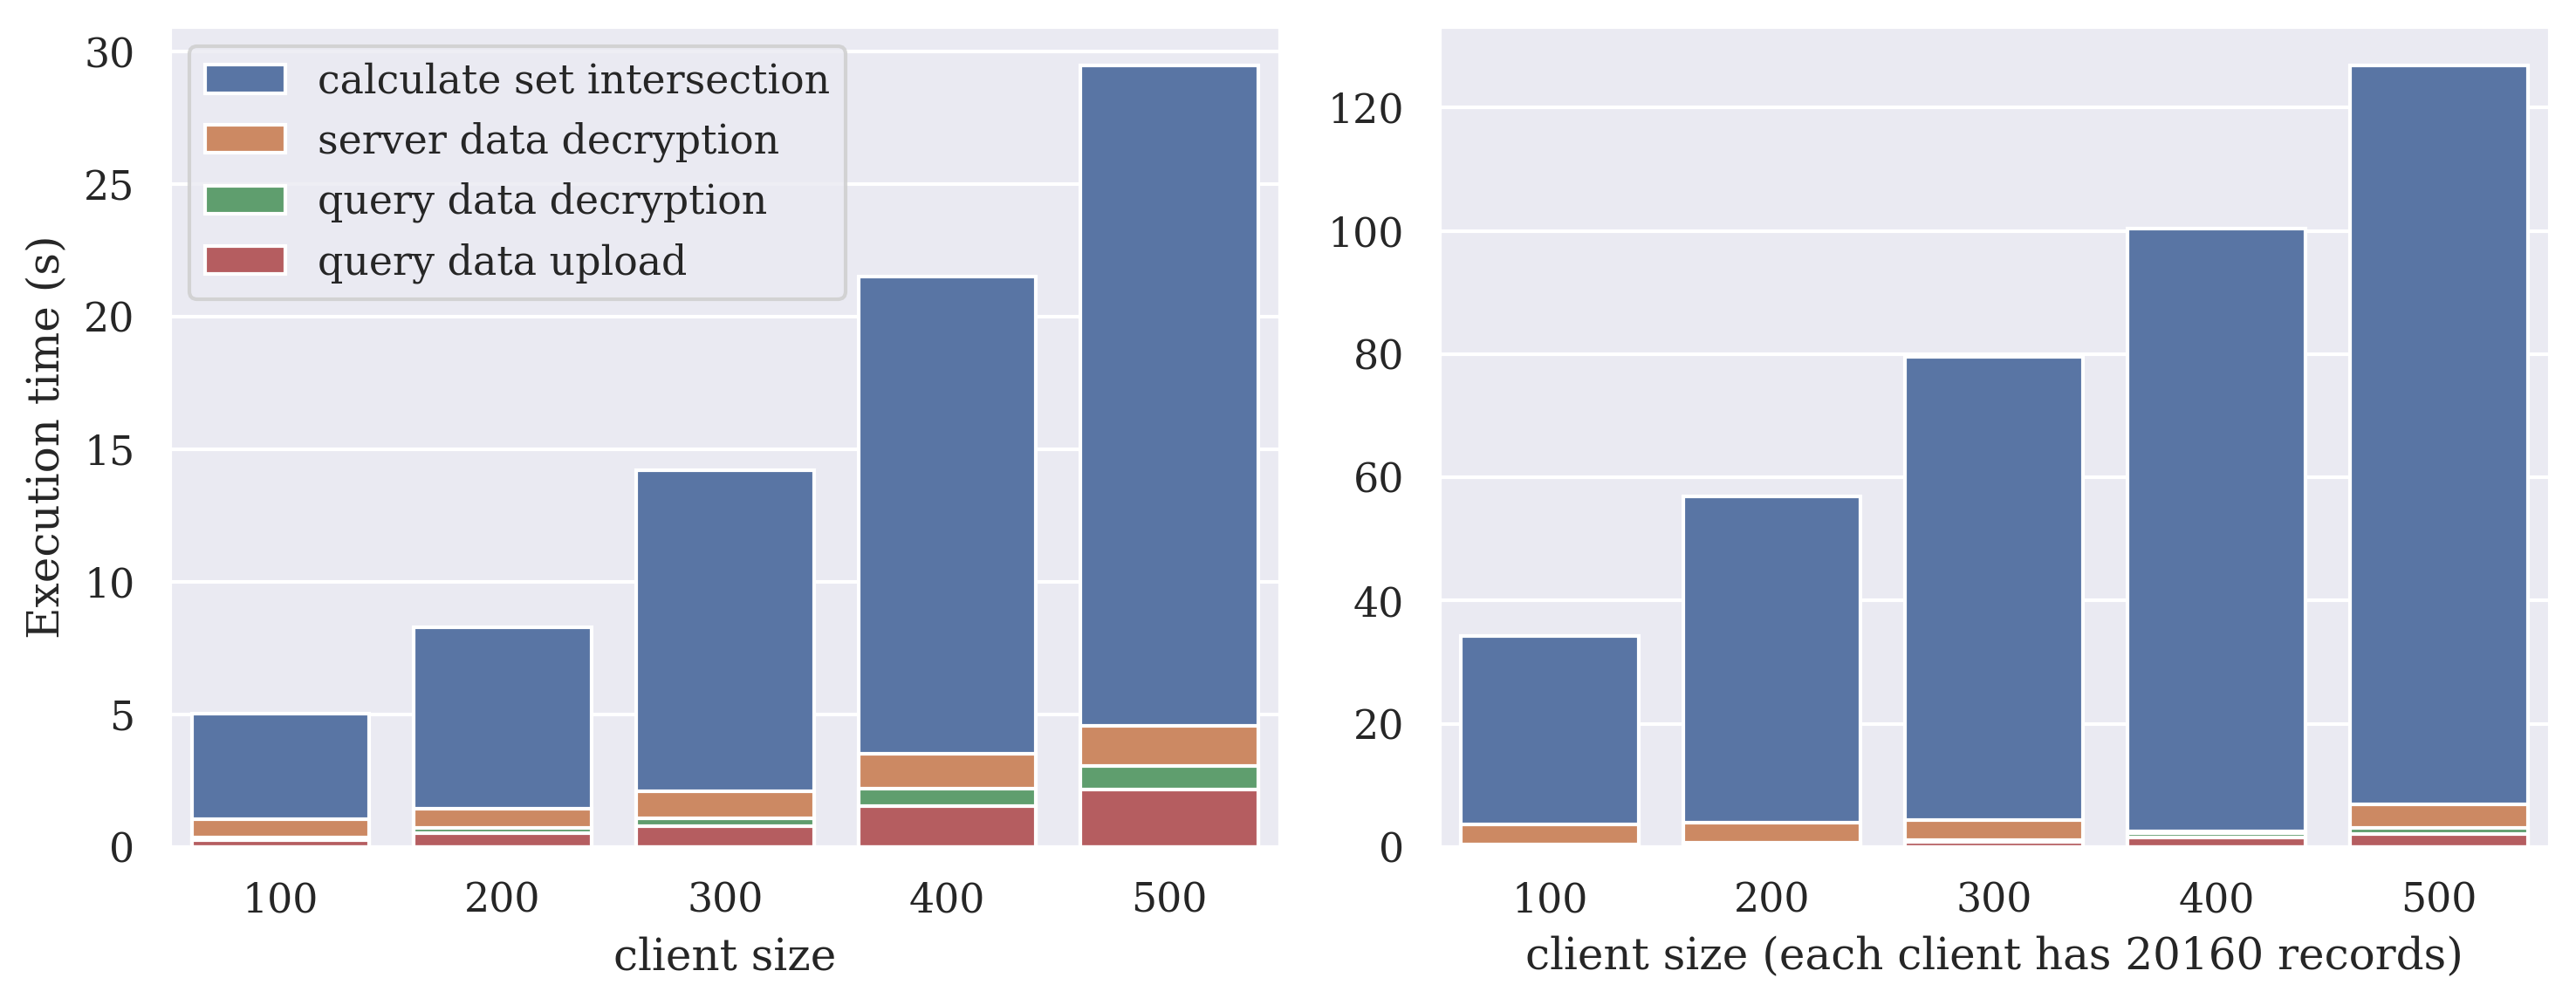

In [201]:
## こっちはチャンク数27
psi = [3.992428,6.846082,12.113563 ,17.990540,24.935105]
server_data_dec = [0.675746,0.718844,1.026602,1.32224,1.487746]
query_dec = [0.097769,0.191163,0.284817,0.666441,0.912954]
query_upload = [0.269567,0.529249,0.790288,1.534945,2.159851]

agg1 = np.sum([psi, query_dec, server_data_dec, query_upload], axis=0)
agg2 = np.sum([agg1, -np.array(psi)], axis=0)
agg3 = np.sum([agg2, -np.array(server_data_dec)], axis=0)
agg4 = np.sum([agg3, -np.array(query_dec)], axis=0)

df = pd.DataFrame({
    "psi": agg1,
    "server data decryption" : agg2,
    'query decryption': agg3,
    "query upload": agg4,
    "client size": [100,200,300,400,500],
})

fig = plt.figure(dpi=300, figsize=(10, 4.0))

ax = fig.add_subplot(1, 2, 1) 

sns.barplot(x = 'client size', y = 'psi', data = df, color = current_palette[0], ax=ax, label='calculate set intersection')
sns.barplot(x = 'client size', y = 'server data decryption', data = df, color = current_palette[1],ax=ax, label='server data decryption')
sns.barplot(x = 'client size', y = 'query decryption', data = df, color = current_palette[2],ax=ax, label='query data decryption')
sns.barplot(x = 'client size', y = 'query upload', data = df, color = current_palette[3],ax=ax, label='query data upload')

ax.legend()
ax.set_ylabel('Execution time (s)')
ax2.set_xlabel('client size (each client has 20160 records)')

## こっちはチャンク数1
psi = [30.515462,52.915059,75.170252 ,97.820634,119.941292 ]
server_data_dec = [3.321846,3.31,3.31,.334,3.85]
query_dec = [0.097769,0.191163,0.284817,0.666441,0.912954]
query_upload = [0.269637,0.529249,0.790288,1.534945,2.159851]

agg1 = np.sum([psi, query_dec, server_data_dec, query_upload], axis=0)
agg2 = np.sum([agg1, -np.array(psi)], axis=0)
agg3 = np.sum([agg2, -np.array(server_data_dec)], axis=0)
agg4 = np.sum([agg3, -np.array(query_dec)], axis=0)

df = pd.DataFrame({
    "psi": agg1,
    "server data decryption" : agg2,
    'query decryption': agg3,
    "query upload": agg4,
    "client size": [100,200,300,400,500],
})

ax2 = fig.add_subplot(1, 2, 2) 

sns.barplot(x = 'client size', y = 'psi', data = df, color = current_palette[0], ax=ax2, label='calculate set intersection')
sns.barplot(x = 'client size', y = 'server data decryption', data = df, color = current_palette[1],ax=ax2, label='server data decryption')
sns.barplot(x = 'client size', y = 'query decryption', data = df, color = current_palette[2],ax=ax2, label='query data decryption')
sns.barplot(x = 'client size', y = 'query upload', data = df, color = current_palette[3],ax=ax2, label='query data upload')

ax.legend()
ax2.set_ylabel('')
ax2.set_xlabel('client size (each client has 20160 records)')

plt.tight_layout()
plt.show()
fig.savefig('total-perfor.png')

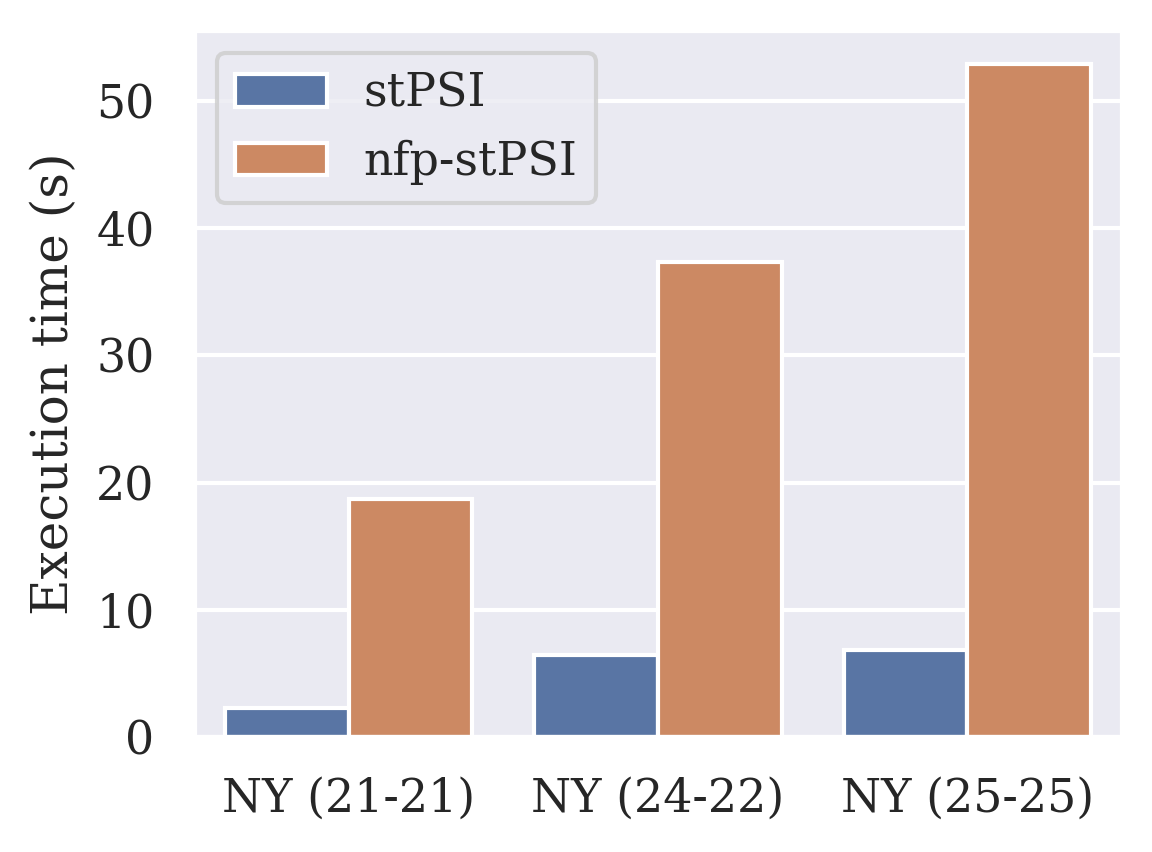

In [212]:
# 24-22 stPSI $ FEATURE="fsa th64" make && RUST_BACKTRACE=1 bin/app 10155555  tools/trajectory_hash/data/24-22 200 tools/trajectory_hash/data/24-22/server-5000-24-22.csv 

params_df = {
    'dataset': ['NY (21-21)', 'NY (21-21)', 'NY (24-22)', 'NY (24-22)',  'NY (25-25)', 'NY (25-25)'],
    'size (MB)': [2.261195, 18.709085, 6.492351, 37.298196, 6.846082, 52.915059],
    'algorithm': ['stPSI', 'nfp-stPSI', 'stPSI', 'nfp-stPSI', 'stPSI', 'nfp-stPSI'],
}

fig = plt.figure(figsize=(4.0, 3.0), dpi=300)

ax1 = fig.add_subplot(1,1,1)
sns.barplot(x='dataset', hue="algorithm", y="size (MB)", data=params_df, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Execution time (s)')

plt.tight_layout()
plt.show()
fig.savefig('params-perfor.png')

## Kinki & Tokyo

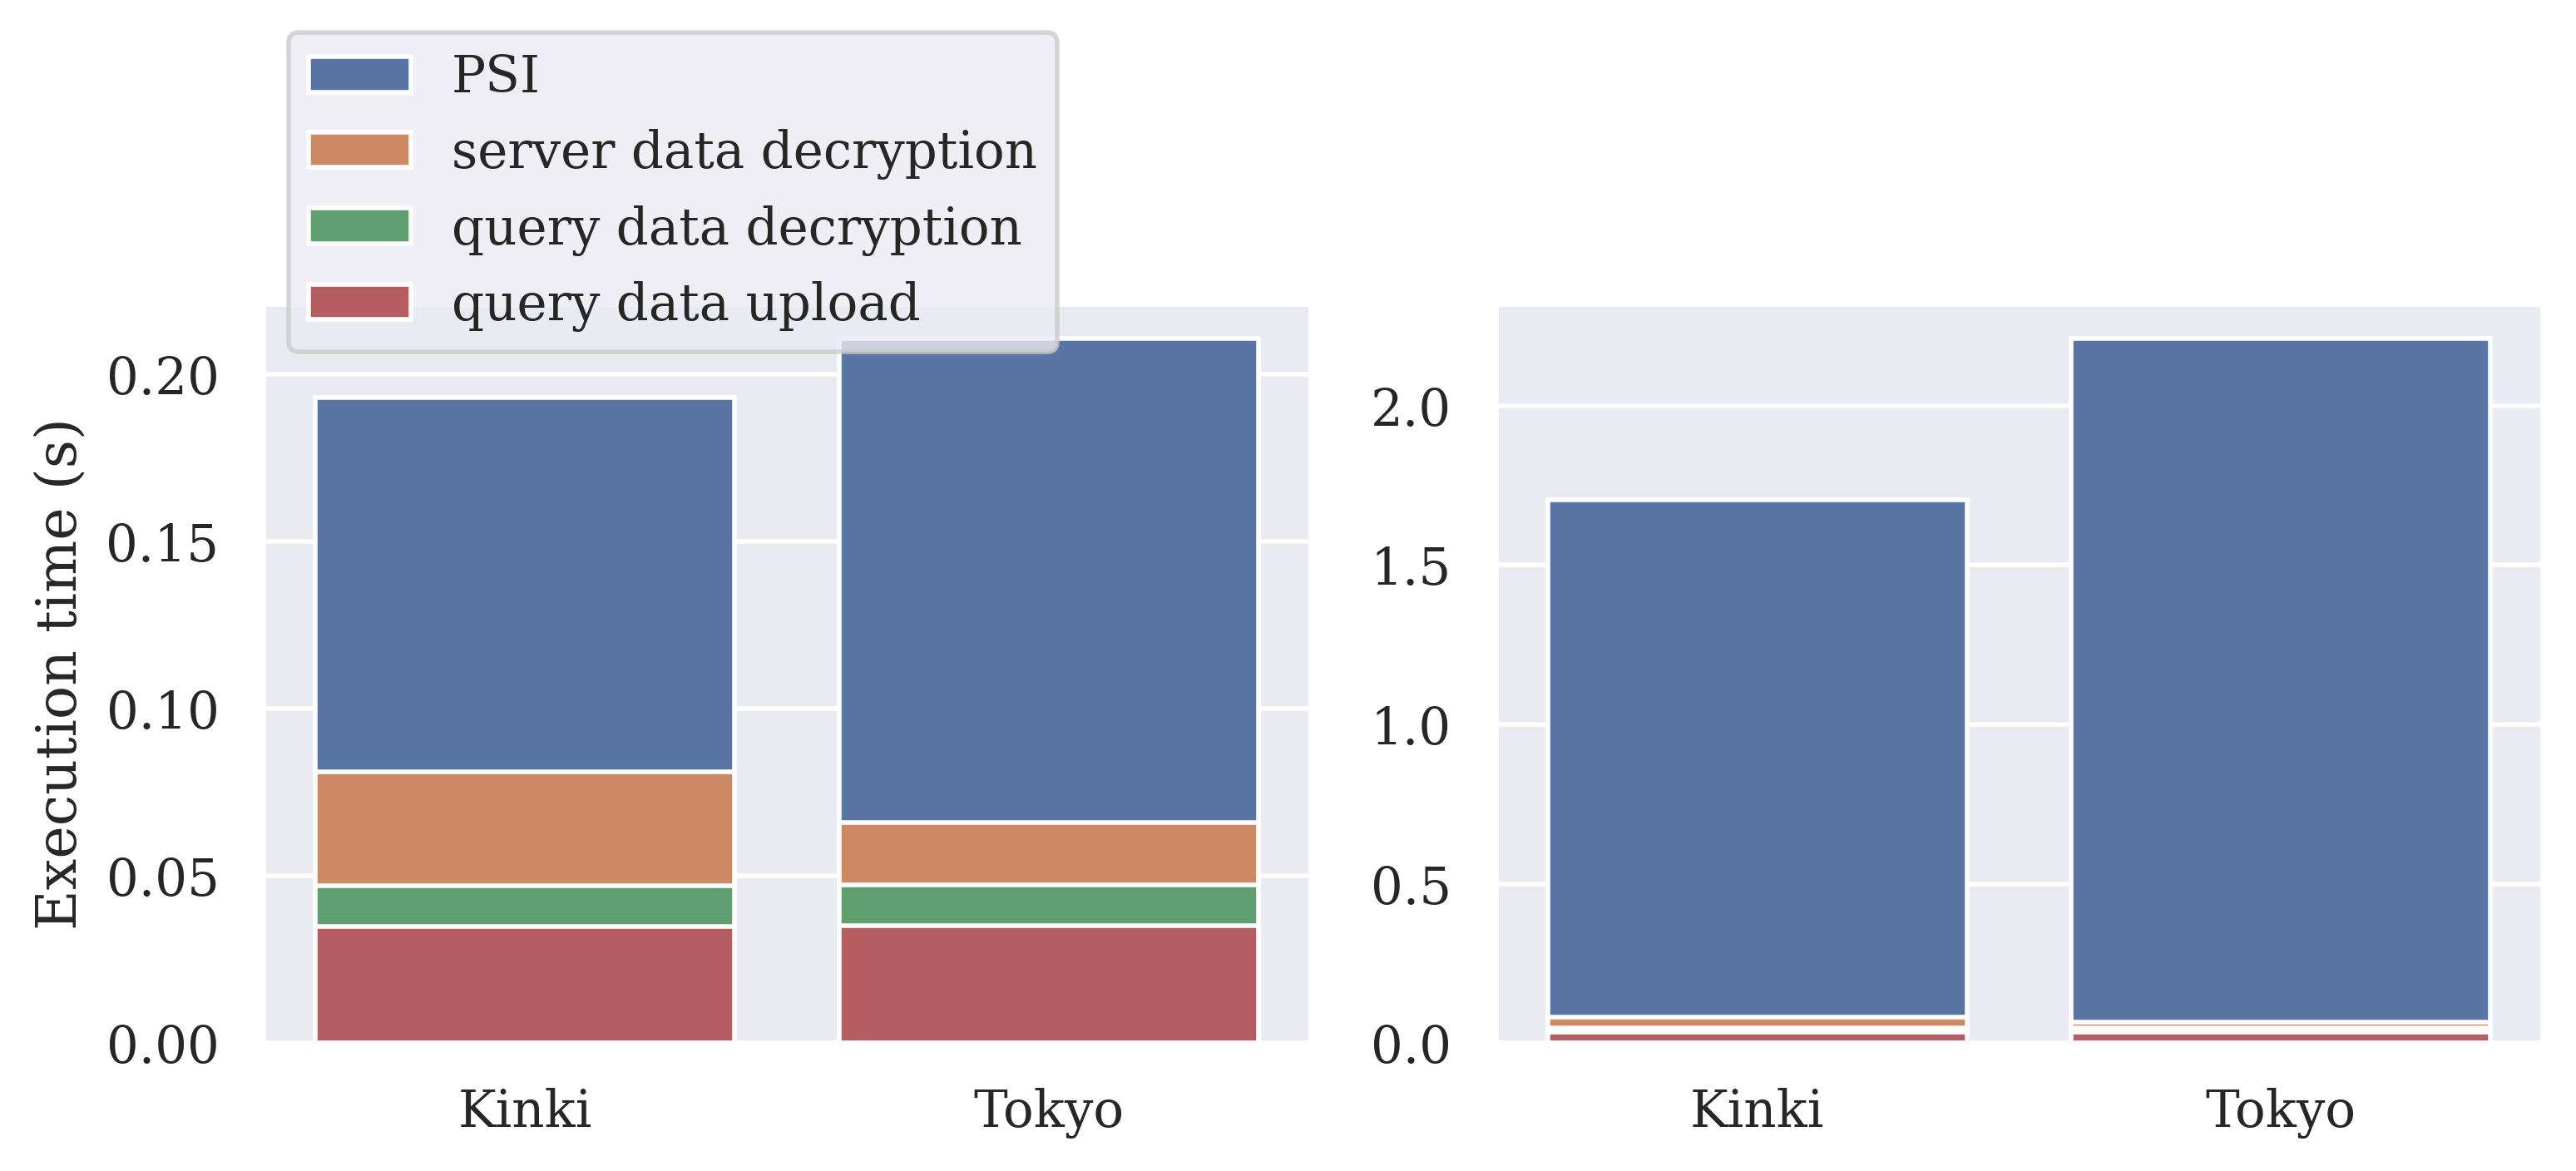

In [213]:
# stPSI
psi             = [0.111831, 0.144558]
server_data_dec = [0.033869, 0.018840]
query_dec       = [0.012314, 0.012022]
query_upload    = [0.034798, 0.035148]

agg1 = np.sum([psi, query_dec, server_data_dec, query_upload], axis=0)
agg2 = np.sum([agg1, -np.array(psi)], axis=0)
agg3 = np.sum([agg2, -np.array(server_data_dec)], axis=0)
agg4 = np.sum([agg3, -np.array(query_dec)], axis=0)

df = pd.DataFrame({
    "psi": agg1,
    "server data decryption" : agg2,
    'query decryption': agg3,
    "query upload": agg4,
    "client size": ['Kinki', 'Tokyo'],
})

fig = plt.figure(dpi=400, figsize=(8, 4.0))


ax = fig.add_subplot(1, 2, 1)

sns.barplot(x = 'client size', y = 'psi', data = df, color = current_palette[0], ax=ax, label='PSI')
sns.barplot(x = 'client size', y = 'server data decryption', data = df, color = current_palette[1],ax=ax, label='server data decryption')
sns.barplot(x = 'client size', y = 'query decryption', data = df, color = current_palette[2],ax=ax, label='query data decryption')
sns.barplot(x = 'client size', y = 'query upload', data = df, color = current_palette[3],ax=ax, label='query data upload')

ax.legend(loc='upper left', bbox_to_anchor=(0, 1.4))
ax.set_xlabel('')
ax.set_ylabel('Execution time (s)')



# nfp-PSI
psi             = [1.622237, 2.144230]
server_data_dec = [0.033671, 0.018840]
query_dec       = [0.012259, 0.012022]
query_upload    = [0.034798, 0.035148]

agg1 = np.sum([psi, query_dec, server_data_dec, query_upload], axis=0)
agg2 = np.sum([agg1, -np.array(psi)], axis=0)
agg3 = np.sum([agg2, -np.array(server_data_dec)], axis=0)
agg4 = np.sum([agg3, -np.array(query_dec)], axis=0)

df = pd.DataFrame({
    "psi": agg1,
    "server data decryption" : agg2,
    'query decryption': agg3,
    "query upload": agg4,
    "client size": ['Kinki', 'Tokyo'],
})

ax2 = fig.add_subplot(1, 2, 2) 

sns.barplot(x = 'client size', y = 'psi', data = df, color = current_palette[0], ax=ax2, label='PSI')
sns.barplot(x = 'client size', y = 'server data decryption', data = df, color = current_palette[1],ax=ax2, label='server data decryption')
sns.barplot(x = 'client size', y = 'query decryption', data = df, color = current_palette[2],ax=ax2, label='query data decryption')
sns.barplot(x = 'client size', y = 'query upload', data = df, color = current_palette[3],ax=ax2, label='query data upload')

# ax.legend()
ax2.set_xlabel('')
ax2.set_ylabel('')


plt.tight_layout()
plt.show()
fig.savefig('tokyo-kinki.png')